## Riddler Classic Dec 7th


In [6]:
import random
import math
class Home:
    def __init__(self):
        r = random.random()
        phi = random.random()* 2*math.pi
        self.set_r_phi(r,phi)
        
    def set_r_phi(self, r, phi):
        self.r = r
        self.phi = phi
        self.x = r*math.cos(phi)
        self.y = r*math.sin(phi)
    def set_x_y(self, x, y):
        self.x = x 
        self.y = y
        self.r = math.sqrt(x**2 + y**2)
        self.phi = math.atan2(y,x)
        if self.r > 1:
            self.set_r_phi(1, self.phi)

In [7]:
homes = [Home() for i in range(6)]

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from IPython import display
import numpy as np
class Prairie:
    
    def __init__(self, nhomes=7):
        self.homes = [Home() for i in range(nhomes)]
        self.colors = np.random.rand(nhomes,3)
        self.historyx = []
        self.historyy = []
    def draw(self):
        xs  = [h.x for h in self.homes]
        ys  = [h.y for h in self.homes]
        f = plt.figure(figsize=(5,5))
        
        f.gca().add_artist(Circle((0,0),1,linewidth=1,edgecolor='k',facecolor='none'))
        plt.scatter(xs, ys,c =self.colors)
        plt.ylim(-1,1)
        plt.xlim(-1,1)
        for i in range(len(self.homes)):
            plt.annotate("%d" %i, (xs[i]+ .02, ys[i]+.02))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
    def update(self, delta = .01):
        self.xs = np.array([h.x for h in self.homes])
        self.ys = np.array([h.y for h in self.homes])
        nearest = [self.find_nearest(i) for i in range(len(self.homes))]
        
        angles = [math.atan2(
            self.ys[i] - self.ys[nearest[i]],
            self.xs[i] - self.xs[nearest[i]],
        ) for i in range(len(self.homes))]
        #print nearest
        #print np.array(angles)*180/math.pi
        
        dxs = delta*np.cos(angles)
        dys = delta*np.sin(angles)
        
        for home, dx, dy in zip(self.homes, dxs, dys):
            home.set_x_y(home.x + dx, home.y + dy)
        self.historyx.append(np.copy(self.xs))
        self.historyy.append(np.copy(self.ys))
    def draw_history(self):
        xs  = [h.x for h in self.homes]
        ys  = [h.y for h in self.homes]
        self.historyx.append(np.copy(xs))
        self.historyy.append(np.copy(ys))
        f = plt.figure(figsize=(5,5))
        
        f.gca().add_artist(Circle((0,0),1,linewidth=1,edgecolor='k',facecolor='none'))
        
        historyx = np.array(self.historyx).T
        historyy = np.array(self.historyy).T
        for i in range(len(self.homes)):
            plt.plot(historyx[i],historyy[i], '-', color=self.colors[i])
        plt.scatter(xs, ys, c=self.colors)
        plt.ylim(-1,1)
        plt.xlim(-1,1)
        for i in range(len(self.homes)):
            plt.annotate("%d" %i, (xs[i]+ .02, ys[i]+.02))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
    def find_nearest(self, i):
        distances = (self.xs - self.xs[i])**2 + (self.ys - self.ys[i])**2
        #print distances
        idx = np.delete(distances, i).argmin()
        if idx >= i: idx +=1
        return idx
    def find_nearest_distance(self, i):
        distances = (self.xs - self.xs[i])**2 + (self.ys - self.ys[i])**2
        #print distances
        return np.delete(distances, i).min()
        
    def find_nearest_distances(self):
        self.xs = np.array([h.x for h in self.homes])
        self.ys = np.array([h.y for h in self.homes])
        for i in range(len(self.homes)):
            print i, self.find_nearest_distance(i)
        
        
        

0 0.9801712412743886
1 1.0016835743052455
2 1.0049438924474416
3 0.9806189218572319
4 0.9801712412743886
5 0.9806189218572319
6 0.9919197023025896


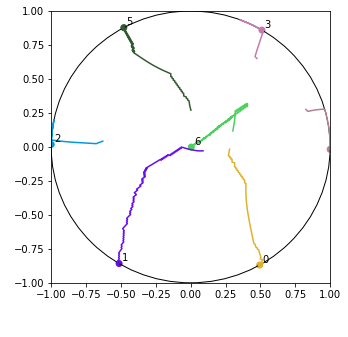

In [9]:
prairie = Prairie(nhomes=7)
for i in range(200):
    prairie.update()
prairie.draw_history()
prairie.find_nearest_distances()

0 0.9918014066379155
1 0.991249080496061
2 1.0035600752679588
3 0.991249080496061
4 1.0102029462545639
5 1.004688571828567


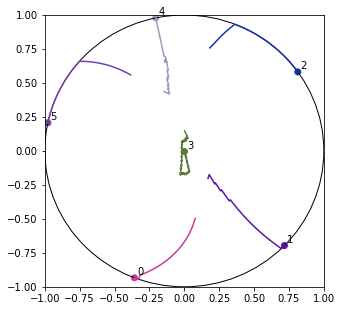

In [10]:
prairie = Prairie(nhomes=6)
for i in range(200):
    prairie.update()
prairie.draw_history()
prairie.find_nearest_distances()